In [2]:
import numpy as np  # Numerical computation
import numpy.linalg as la  # Linear Algebra 
import matplotlib as mp  # Generating plots
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # Setting the plotting style
mp.rcParams['figure.figsize'] = (9, 7)  # Setting the size of the plots
%matplotlib notebook  

In [3]:
Nsites = 25              # Number of lattice sites
Nprime = 2*Nsites
e_threshold = 1E-6	 # Threshold for finding zero eigenstates
params = {
't' : 2.0,               # Nearest neighbor hopping
'Delta' : 2.0,           # Superconducting pairing term
'mu' : 0.0               # Chemical potential
}

In [4]:
def kitaev_ham(Nsites,params):
    Hmat = np.zeros([Nprime,Nprime])  # Declare a 2Nx2N matrix
    Jx = 0.5*(params['t'] - params['Delta']) 
    Jy = 0.5*(params['t'] + params['Delta'])
    
    for n in range(Nsites-1):
        Hmat[2*n,2*n+1]   = Jx
        Hmat[2*n+1,2*n]   = -Jx
        Hmat[2*n-1,2*n+2] = -Jy
        Hmat[2*n+2,2*n-1] = Jy
        Hmat[2*n-1,2*n]   = params['mu']
        Hmat[2*n,2*n-1]   = -params['mu']

    Hmat[2*(Nsites-1)-1,2*(Nsites-1)] = params['mu']
    Hmat[2*(Nsites-1),2*(Nsites-1)-1] = -params['mu']
    Hmat = 1j*Hmat

    return Hmat

In [5]:
def visualise_mat(Hmat):
    plt.imshow(Hmat.imag) # The real part of the matrix is a zero matrix
    plt.colorbar()
    plt.show()

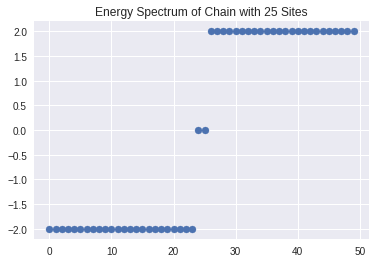

In [8]:
def plot_spectrum(Hmat):
    evals,evecs = la.eigh(Hmat)
    evals = evals.real
    plt.scatter(np.arange(len(evals)),evals)
    plt.title('Energy Spectrum of Chain with {} Sites'.format(Nsites))
    plt.show()
%matplotlib inline
plot_spectrum(kitaev_ham(Nsites,params))

In [9]:
# Extract the indices of energy modes close to zero
def check_zeromodes(evals):
    nzmodes = 0
    zmodes_ind = np.where(abs(evals) <= e_threshold)[0]
    return zmodes_ind,len(zmodes_ind)

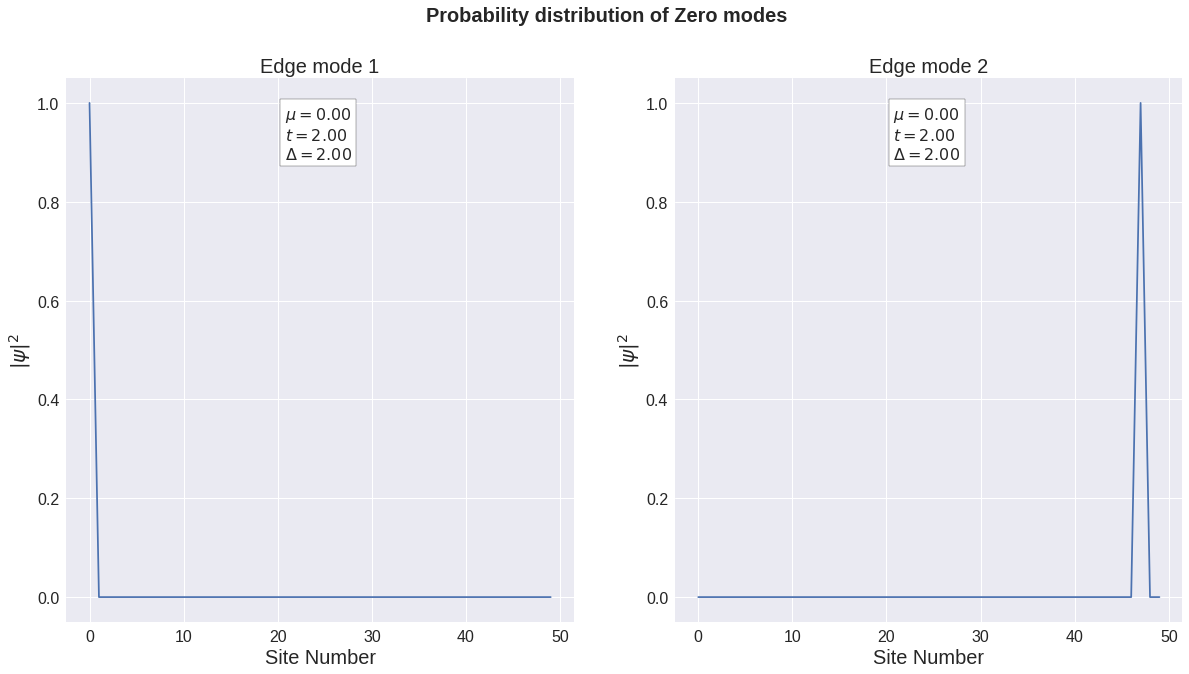

In [10]:
def plot_zeromodes(evals,evecs,params):

    param_info = '\n'.join((
    r'$\mu=%.2f$' % (params['mu']),
    r'$t=%.2f$' % (params['t']),
    r'$\Delta=%.2f$' % (params['Delta'])))

    zmodes_ind,cnt_zmodes = check_zeromodes(evals)
    if cnt_zmodes > 0:
        fig,ax = plt.subplots(1,cnt_zmodes,figsize=(20, 10))
        fig.suptitle('Probability distribution of Zero modes',fontsize=20, fontweight='bold')
        for cnt in range(cnt_zmodes):
            ax1 = ax[cnt]
            ax1.plot(np.abs(evecs[:,zmodes_ind[cnt]])**2)
            ax1.set_title('Edge mode {}'.format(cnt+1),fontsize=20)
            ax1.set_xlabel('Site Number',fontsize=20)
            ax1.set_ylabel('$|\psi|^2$',fontsize=20)
            ax1.text(0.43, 0.95, param_info, transform=ax1.transAxes, fontsize=16,
        verticalalignment='top', bbox=dict(boxstyle="square",facecolor="white"))
            ax1.tick_params(axis='both', which='major', labelsize=16)
        #plt.savefig('Edge_modes_Kitaev.pdf')
        plt.show()
        
evals,evecs = la.eigh((kitaev_ham(Nsites,params)))
plot_zeromodes(evals,evecs,params)

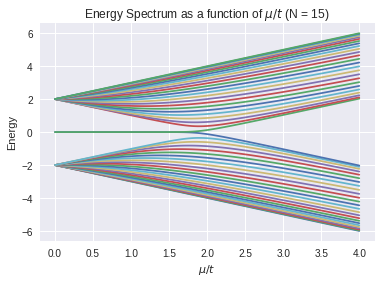

In [11]:
var_mu = np.linspace(0,4,101)
var_energy = np.zeros([len(var_mu),Nprime])

for i in range(len(var_mu)):
    var_energy[i] = la.eigh(kitaev_ham(Nsites,params = {'t' : 2.0,'Delta' : 2.0, 'mu' : var_mu[i]}))[0]

plt.title("Energy Spectrum as a function of $\mu/t$ (N = 15)")
for i in range(Nprime):
    plt.plot(var_mu,var_energy[:,i])
plt.ylabel('Energy')
plt.xlabel('$\mu/t$')
plt.show()

In [ ]:
#Original source: https://crangi.github.io/post/kitaev_chain/  
#Executed by Bhadale IT, Aug 2022. No intention of any copyright infringments, all code owned by respective owners